In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')

In [2]:
env_config = {
    "col" : "dns.col",
    "N_batch": 5,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [[1,1,1],[1,1,1],[1,1,1]],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1],np.zeros(10).reshape(-1,1))),
                    np.hstack((np.mgrid[0:20, 1:4][1],np.zeros(20).reshape(-1,1))),
                    np.hstack((np.mgrid[0:40, 1:4][1],np.zeros(40).reshape(-1,1)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(10),np.zeros(20),np.zeros(40)], #All data is initialized to the first step of it's rplan
    "init_expir": [np.ones((10,3))*20,np.ones((20,3))*20,np.ones((40,3))*20], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['label0']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['label0']),
           pd.DataFrame(index = np.arange(40),columns=['label0'])]
}

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals = np.array([0,0])
t = 0

In [4]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.zeros((5,3)),columns=['Age','Key Terrain','Queries'])
val_tot = np.zeros((5,3))
rplan = np.hstack((np.mgrid[0:5, 1:4][1],np.zeros(5).reshape(-1,1)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load(env, db, 10)

vals = np.vstack((vals, np.array([np.sum(env.values0_init[:,1]),np.sum(env.values1_init[:,1])])))
t += 1

env.render(out=0)

sub = plt.subplot()
sub.plot(np.arange(t+1),vals[:,0], c = 'b', label = 'Uncompressed')
sub.plot(np.arange(t+1),vals[:,1], c = 'r', label = 'Compressed')
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
sub.legend(loc=2)
plt.show()

env.render(out=1)
print(env.del_val)

reward [nan]
reward [nan]
reward [nan]


TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

In [26]:
env.__myinit__()
#np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals = np.array([0,0])
t = 0

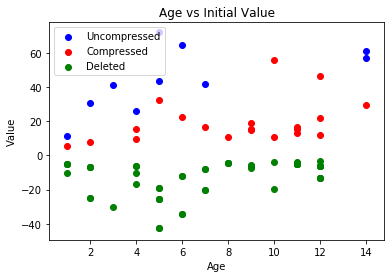

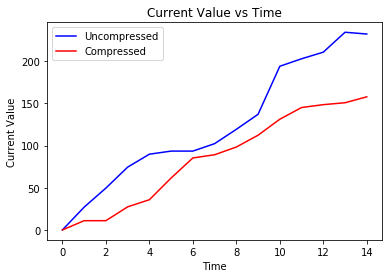

Uncompressed Database:
                  uid                                   src  sport   age  \
0   CghXHv4P9sybq1dnL                       192.168.202.100  45658  14.0   
1   CTySHd36MODzjqHEh                        192.168.202.76    137  14.0   
2    CP0GkVYOcUStxcH8                        192.168.202.89    137   3.0   
3  CwGoWM18B7jZYEcjvi                        192.168.202.77    137   5.0   
4   CT6ScvybqNfoWT8Eg                        192.168.202.76    137   2.0   
5  Cfmlu52EOuSovdrpj2                        192.168.202.89  57144   4.0   
6    CFHwOcUAkavh7LyG                        192.168.202.71    137   5.0   
7    CFHwOcUAkavh7LyG                        192.168.202.71    137   7.0   
8    CFHwOcUAkavh7LyG                        192.168.202.71    137   6.0   
9  CaaGYj1xT7ljjZgHo3  2001:dbb:c18:202:f2de:f1ff:fe9b:ad6a   5353   1.0   

       value  
0  60.962381  
1  57.251938  
2  41.543705  
3  43.387131  
4  30.865787  
5  25.819568  
6  72.150793  
7  42.105430  
8  64

0

In [40]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pandas.read_csv("dns.log", header=loop)
values = np.random.exponential([10.0, 10.0, 10.0, 10.0, 10.0])
loop += 5

toy_agents.batch_load(env, batch, values, 100)

vals = np.vstack((vals, np.array([np.sum(env.values0_init[:,1]),np.sum(env.values1_init[:,1])])))
t += 1

env.render(out=0)

sub = plt.subplot()
sub.plot(np.arange(t+1),vals[:,0], c = 'b', label = 'Uncompressed')
sub.plot(np.arange(t+1),vals[:,1], c = 'r', label = 'Compressed')
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
sub.legend(loc=2)
plt.show()

env.render(out=1)

In [21]:
import pandas as pd
import numpy as np

In [3]:
a = [pd.DataFrame([0]),pd.DataFrame([1])]

In [4]:
a

[   0
 0  0,    0
 0  1]

In [5]:
a[0]

,0
0,0


In [6]:
a[1]

,0
0,1


In [7]:
316 * 0
458 * 1

In [10]:
a.fillna(0).values[:,1:]

array([[1., 6.],
       [5., 0.]])

In [3]:
a = pd.DataFrame([[3,1,6],[4,5,np.nan]],index = [3,4],columns = [1,2,3])

In [7]:
a.values[:,1:]

array([[ 1.,  6.],
       [ 5., nan]])

In [98]:
weights = np.array([[1],[2],[1]])

In [107]:
weights = np.array([1,2,1])

In [104]:
weights.reshape([-1,1])

array([[1],
       [1],
       [1]])

In [93]:
np.matmul(a.values[:,1:].T,weights[1:].T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [108]:
np.sum(a.values[:,1:]*weights[1:].reshape([-1,1]),axis=1)

array([14, 13])

In [106]:
np.power([5],weights)

array([5, 5, 5])

,1,2,3
3,3,1,6
4,4,5,8


In [127]:
a.iloc[1] =

In [128]:
a

,1,2,3
3,3,1,6
4,3,1,6


In [115]:
c = pd.Series([1,2,3])

In [117]:
c.values[:,1:]

IndexError: too many indices for array

In [131]:
[0,pd.DataFrame([0,0])][1]

,0
0,0
1,0


In [164]:
np.hstack((np.mgrid[0:20, 1:4][1],np.zeros(20).reshape(-1,1)))

array([[1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.],
       [1., 2., 3., 0.]])

In [153]:
np.ones((10,3))*20

array([[20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.],
       [20., 20., 20.]])

In [166]:
b = np.arange(5)+5

In [167]:
b

array([5, 6, 7, 8, 9])

In [171]:
np.argwhere(b==5)[0,0]

0

In [172]:
def bob(a,b):
    return a+b

In [173]:
my_bob = lambda a: bob(a,1)

In [174]:
my_bob(2)

3

In [181]:
np.arange(3)[::-1]+1

array([3, 2, 1])

In [3]:
a = pd.DataFrame([[3,1,6],[4,5,8]],index = [3,4],columns = [1,2,3])
expir = np.ones(2)*3

In [5]:
a.notna()

,1,2,3
3,True,True,True
4,True,True,True


In [199]:
a[1].shape[0]

2

In [200]:
np.empty((3,3))

array([[4.9e-324, 9.9e-324, 1.5e-323],
       [4.9e-324, 9.9e-324, 1.5e-323],
       [4.9e-324, 9.9e-324, 1.5e-323]])

In [210]:
b = pd.DataFrame(index = np.arange(2),columns = np.arange(2))

In [213]:
b

,0,1
0,1,NaN
1,NaN,NaN


In [212]:
b[0][0] =1

In [209]:
if b[0][0] is np.nan:
    print('hi')

hi


In [232]:
test = np.array([0,1,np.nan,np.nan])

In [233]:
np.argmin(test)

2

In [231]:
np.argmax(test[~np.isnan(test)])

1

In [224]:
test[test is not np.nan]

array([[ 0.,  1., nan]])

In [230]:
[np.isnan(test)]

[array([False, False,  True])]

In [252]:
a is np.nan

True

In [251]:
a = np.nan
a

nan

In [241]:
[np.isnan(x) for x in test]

[False, False, True, True]

In [240]:
[x for x in test]

[0.0, 1.0, nan, nan]

In [246]:
a = test[2]

In [259]:
a=False

In [260]:
if not a:
    print('hi')

hi


In [281]:
c

[0, 1, 2, 3]

In [278]:
b[1][b[1].isnull()]

0    False
1    False
Name: 1, dtype: bool

In [269]:
c = [0,1,2,3]

In [272]:
c[b[0].notna().values.tolist()]

TypeError: list indices must be integers or slices, not list

In [284]:
b.values[b[0].notna(),1:]

array([[nan]], dtype=object)

In [285]:
a = pd.DataFrame()

In [286]:
a[0] = [0,1,2]

In [287]:
a

,0
0,0
1,1
2,2


In [288]:
a[1] = [0,1,2]

In [290]:
a[2] = [1,2,3]

In [295]:
a

,0,1,2
0,0,0,1
1,1,1,2
2,2,2,3


In [4]:
a0 = pd.Series([0,1,2])
a1 = 0
a2 = [4,5,6]

In [297]:
len(a0)

3

In [299]:
len(a2)

3

In [12]:
a = pd.DataFrame(columns = np.arange(3))

In [303]:
a.append(a0,ignore_index=True)

,0,1,2
0,0,1,2


In [310]:
a

,0,1,2


In [5]:
bob = type(a0)

In [10]:
isinstance(a0,pd.Series)

True

In [312]:
type(a1)

int

In [313]:
type(a2)

list

In [1]:
import pandas as pd

In [21]:
a = a.append(a0,ignore_index=True)

In [18]:
a2.append(5)

In [19]:
a2

[4, 5, 6, 5]

In [24]:
np.argmin(a2)

0

In [25]:
a2

[4, 5, 6, 5]

In [26]:
j = 0
while j<5:
    j+=1
    if j ==3:
        break
    print(j)

1
2


In [32]:
class bob(object):
    def __init__(self):
        self.a = 0
        self.b = 1

In [37]:
a1 = bob()

In [39]:
b1 = a1.a

In [40]:
a1.a = 2

In [42]:
b1

0

In [43]:
a1.a

2